Setup & Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
%matplotlib inline

Load the Data/csv

In [2]:
df_raw = pd.read_csv('../data/row/solar-measurements_sierraleone-bumbuna_qc.csv', encoding='ISO-8859-1', low_memory=False)
print(df_raw['Timestamp'].head(10))


0    yyyy-mm-dd hh:mm
1    2021-10-30 00:01
2    2021-10-30 00:02
3    2021-10-30 00:03
4    2021-10-30 00:04
5    2021-10-30 00:05
6    2021-10-30 00:06
7    2021-10-30 00:07
8    2021-10-30 00:08
9    2021-10-30 00:09
Name: Timestamp, dtype: object


In [3]:
df = pd.read_csv("../data/row/solar-measurements_sierraleone-bumbuna_qc.csv", encoding='ISO-8859-1')

# Drop the first row (units) and reset index
df = df.drop(index=0).copy()
df.reset_index(drop=True, inplace=True)

# Convert to appropriate data types
numeric_columns = [
    "GHI", "DNI", "DHI", "ModA", "ModB", "Tamb", "RH", "WS", "WSgust",
    "WSstdev", "WD", "WDstdev", "BP", "Precipitation", "TModA", "TModB"
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df["Cleaning"] = pd.to_numeric(df["Cleaning"], errors='coerce')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')

# Drop empty column
df.drop(columns=["Comments"], inplace=True)

df.head()


C:\Users\Tinsae D.D\AppData\Local\Temp\ipykernel_11460\1743415561.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/row/solar-measurements_sierraleone-bumbuna_qc.csv", encoding='ISO-8859-1')


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


Summary Statistics & Missing Values

In [4]:
print("Summary Statistics:")
display(df[numeric_columns].describe())

print("\nMissing Values:")
missing = df.isna().sum()
display(missing[missing > 0])

print("\nColumns with >5% Missing:")
threshold = 0.05 * len(df)
display(missing[missing > threshold])


Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.004806,32.504263,32.593091
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.047556,12.434899,12.009161
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,10.700000,11.100000
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,23.500000,23.800000
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,26.600000,26.900000
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,40.900000,41.300000
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,2.400000,72.800000,70.400000



Missing Values:


Series([], dtype: int64)


Columns with >5% Missing:


Series([], dtype: int64)

Outlier Detection & Basic Cleaning
Z-scores & Flag Outliers computing

In [5]:
z_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_scores = df[z_cols].apply(zscore)
outliers = (np.abs(z_scores) > 3)
print("Outliers detected per column (|Z| > 3):")
display(outliers.sum())

Outliers detected per column (|Z| > 3):


GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64

Data Cleaning - Impute or DropHandle Missing Values (Median Impute)


In [6]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df.dropna(subset=["Timestamp", "Cleaning"], inplace=True)

Export Cleaned Data

In [7]:
os.makedirs("data", exist_ok=True)
df.to_csv("data/sierraleone_clean.csv", index=False)
print("Cleaned CSV saved to data/sierraleone_clean.csv")

Cleaned CSV saved to data/sierraleone_clean.csv


Time Series Analysis

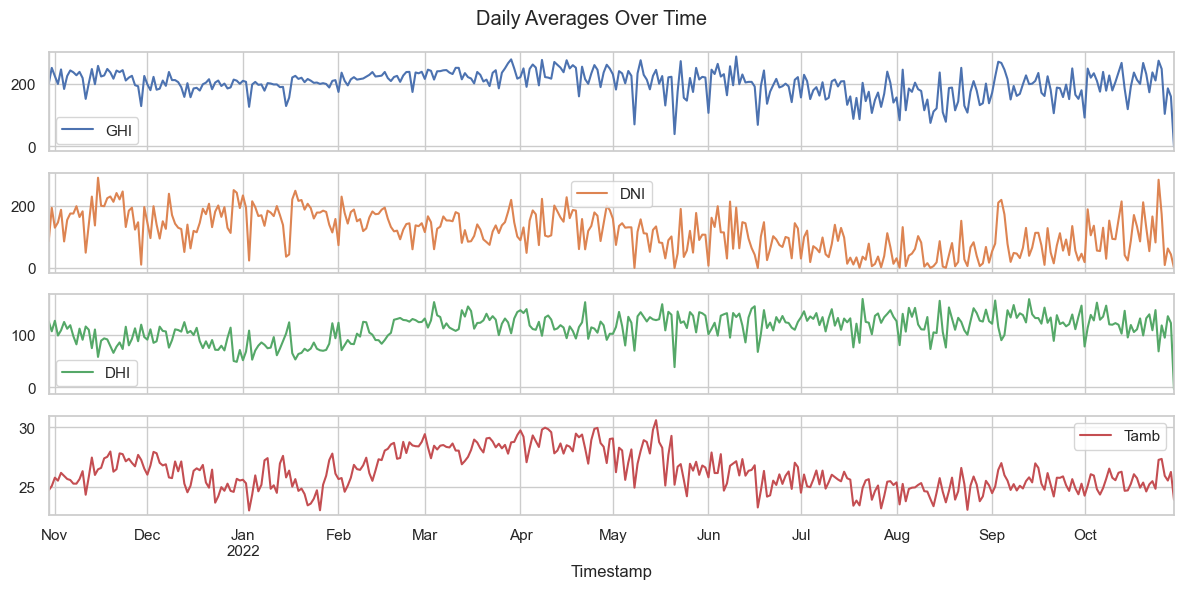

In [8]:
# Cell 7: Time Series Plots
df.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].resample("D").mean().plot(subplots=True, title="Daily Averages Over Time")
plt.tight_layout()
plt.show()

 Cleaning Impact on ModA & ModB

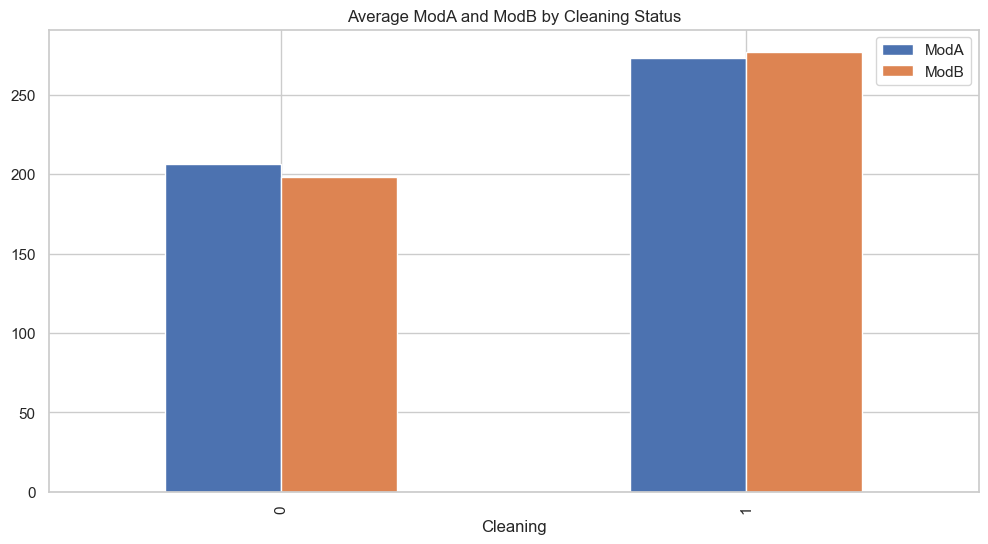

In [9]:
df.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind='bar', title="Average ModA and ModB by Cleaning Status")
plt.show()

Correlation & Relationships

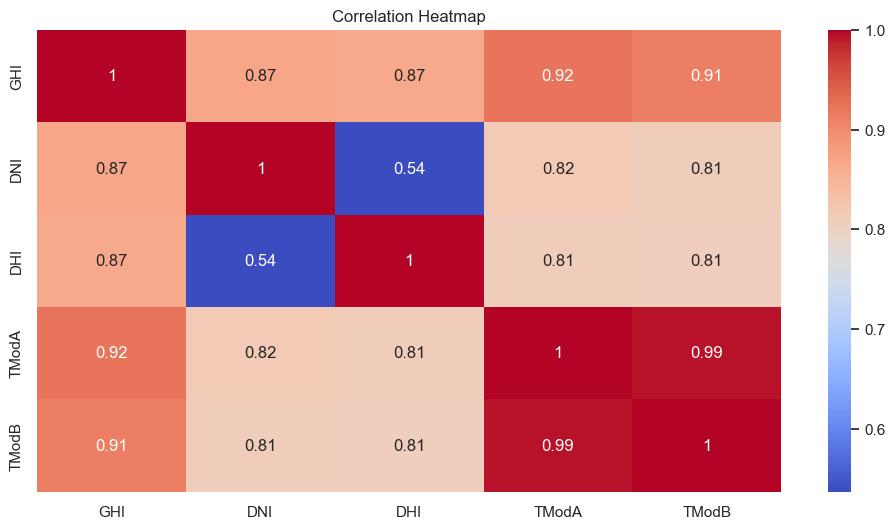

In [10]:
# Cell 9: Correlation Heatmap
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

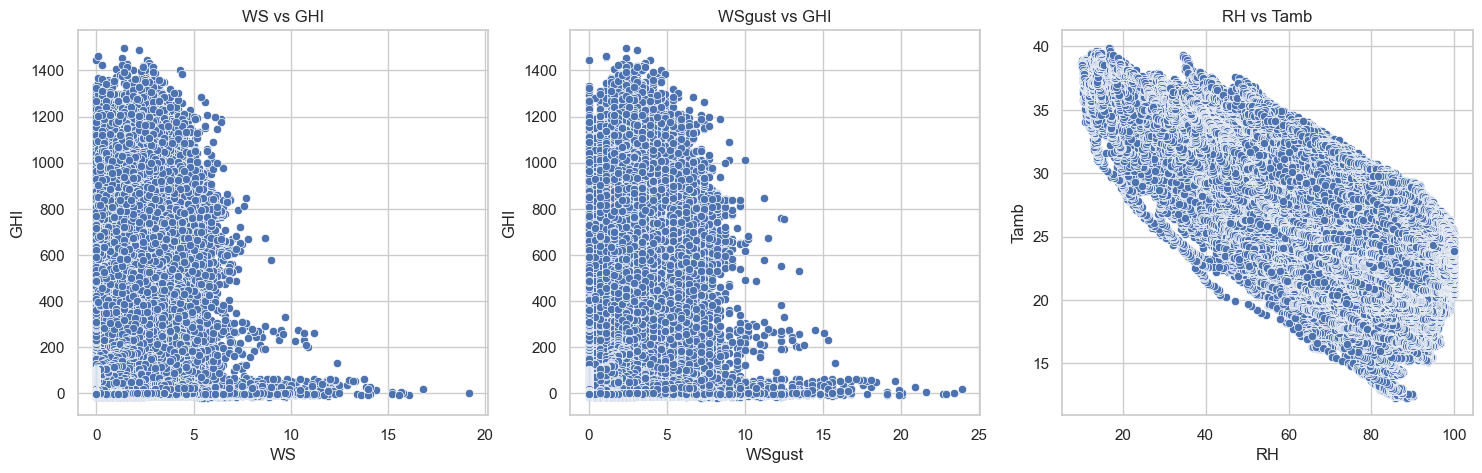

In [11]:
# Cell 10: Scatter Plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x="WS", y="GHI", ax=axs[0])
sns.scatterplot(data=df, x="WSgust", y="GHI", ax=axs[1])
sns.scatterplot(data=df, x="RH", y="Tamb", ax=axs[2])
axs[0].set_title("WS vs GHI")
axs[1].set_title("WSgust vs GHI")
axs[2].set_title("RH vs Tamb")
plt.show()

Wind & Distribution Analysis

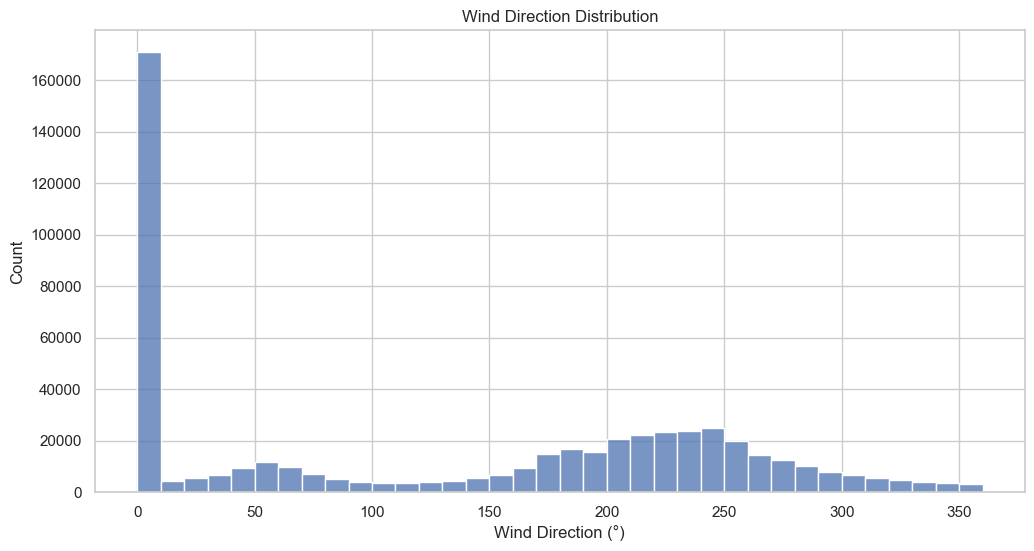

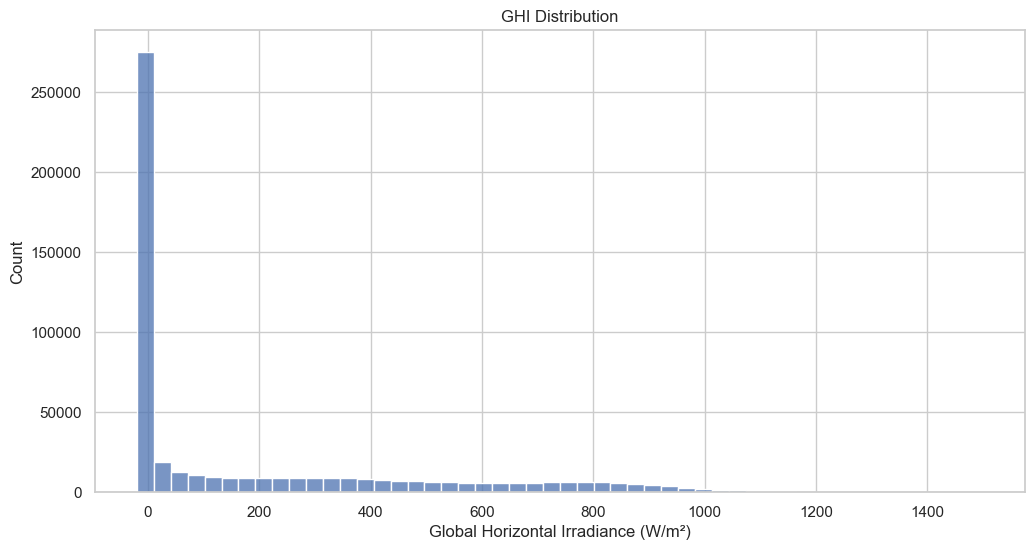

In [12]:
# Cell 11: Wind Distribution & Histogram
sns.histplot(df["WD"], bins=36, kde=False)
plt.title("Wind Direction Distribution")
plt.xlabel("Wind Direction (°)")
plt.show()

sns.histplot(df["GHI"], bins=50)
plt.title("GHI Distribution")
plt.xlabel("Global Horizontal Irradiance (W/m²)")
plt.show()

Temperature Analysis (RH Influence)

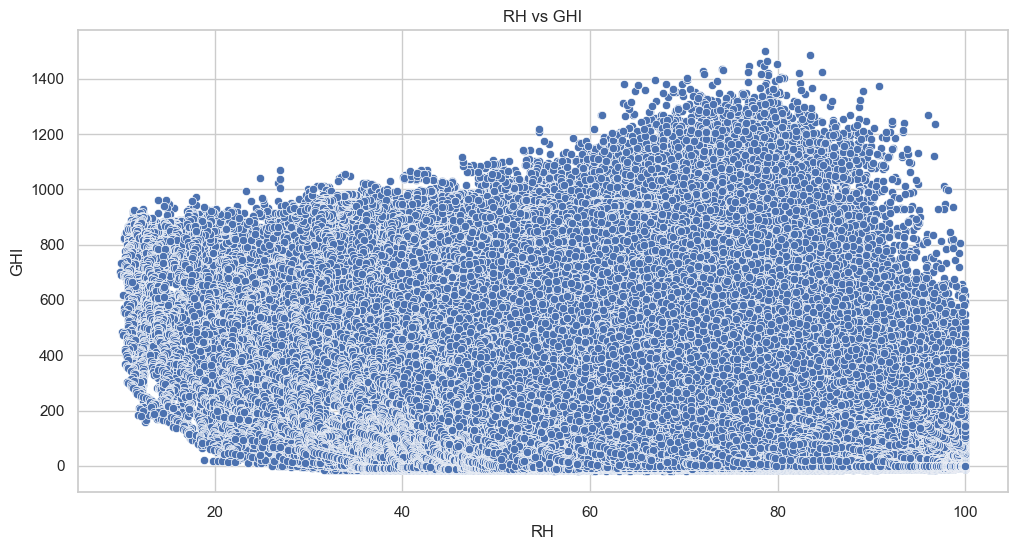

In [13]:
sns.scatterplot(data=df, x='RH', y='GHI')
plt.title("RH vs GHI")
plt.show()

Bubble Chart (Multi-variable Viz)

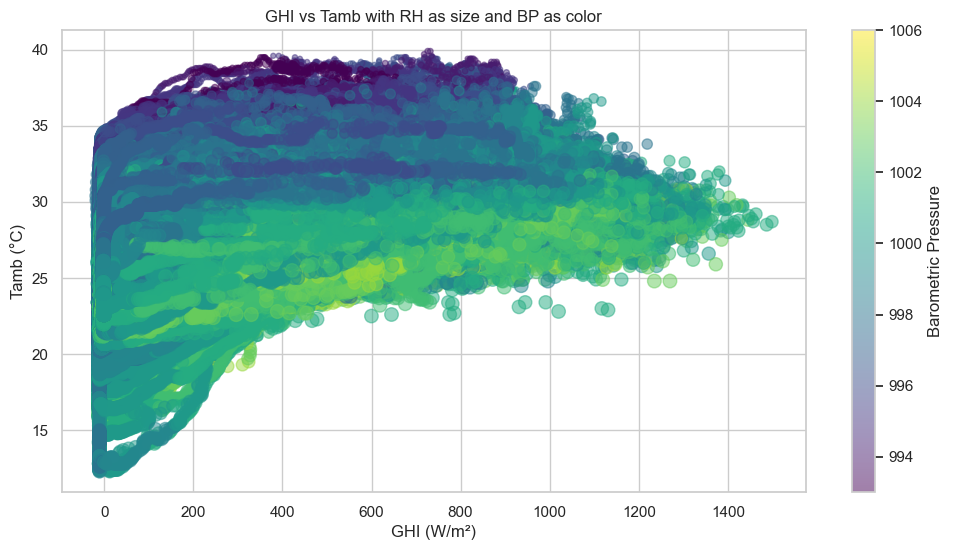

In [14]:
# Cell 12: Bubble Chart
plt.scatter(df["GHI"], df["Tamb"], s=df["RH"], alpha=0.5, c=df["BP"], cmap="viridis")
plt.colorbar(label="Barometric Pressure")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Tamb (°C)")
plt.title("GHI vs Tamb with RH as size and BP as color")
plt.show()